<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<font color="#138D75">**WEkEO Training**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Anna-Lena Erdmann (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4data/wekeo-eocanvas/03_EOCanvas_DataTailor.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3> WEkEO EOCanvas - Processing in the Cloud for Coperncius Data</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
  - **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>**

  

</div>
<hr>

# 3 Using the Data Tailor EOCanvas Function

### Learning outcomes

At the end of this notebook you will know;

* how to use the <a href='https://user.eumetsat.int/resources/user-guides/data-tailor-standalone-guide' target='_blank'>EUMETSAT Data Tailor</a> Chains with the EOCanvas


### Outline

The EOCanvas is a WEkEO service to process Coperncius data in the cloud. This notebooks shows a simple example of how the <a href='https://user.eumetsat.int/resources/user-guides/data-tailor-standalone-guide' target='_blank'>EUMETSAT Data Tailor</a> processing chains can be executed using the EOCavas. 

<div class="alert alert-info" role="alert">

### Contents <a id='totop'></a>

</div>
    
 1. [Setting Up](#section0)
 2. [Inputs to the EOCanvas Data Tailor Process](#section1)
 3. [Executing the Process](#section2)
 4. [Examine the results](#section3)

<hr>

<div class="alert alert-info" role="alert">

## 1. <a id='section0'></a>Setting Up
[Back to top](#totop)
    
</div>

This example notebook shows you how to use the functions of the <a href='https://user.eumetsat.int/resources/user-guides/data-tailor-standalone-guide' target='_blank'>EUMETSAT Data Tailor</a> within the EOCanvas package. If you are a user of the Data Tailor, you can simply reuse your processes chains in the EOCanvas.  

Loadning necessary libraries

In [2]:
from eocanvas import API, Credentials
from eocanvas.api import Input, Config, ConfigOption
from eocanvas.datatailor.chain import Chain
from eocanvas.processes import DataTailorProcess

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, register <a href="https://www.wekeo.eu/" target="_blank">here</a>.

Save your credentials. They will be automatically loaded when required.

In [ ]:
c = Credentials(username="<your_user_name>", password="<your_password>")
c.save()

<div class="alert alert-info" role="alert">

## 2. <a id='section1'></a>Inputs to the EOCanvas Data Tailor Process
[Back to top](#totop)
    
</div>



The Data Tailor function takes two necessary inputs: 

- data: consists of a url from the wEkEO HDA and a key, that acts as a placeholder
- eptc chain: processing workflow of the data tailor inside a .yml file

### 2.1 Data 

The data is given to the serverless function as an **url**. The url is the reference location of the data in the WEkEO HDA. 

To get the url, you need to make a **request for the data using the WEkEO HDA**.

In [3]:
from hda import Client

c = Client()

q = {
  "dataset_id": "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___",
  "dtstart": "2024-07-05T09:28:00.000Z",
  "dtend": "2024-07-05T09:30:00.000Z",
  "timeliness": "NT"
}

r = c.search(q)
url = r.get_download_urls()[0]

inputs = Input(key="img1", url=url)

### 2.2 Processing Workflow "Chain"

The Data Tailor process works with so called "Chains". Chains are processing workflows which are defined in a `.yaml` file. For more information on how the chains are build up and which operators inside chains are supported please refer to the official <a href='https://user.eumetsat.int/resources/user-guides/data-tailor-standalone-guide' target='_blank'>EUMETSAT Data Tailor Documentation</a>. 

In this example a chain is provided to **resample** and **reproject** the Sentinel-3 OLCI L2 WFR product which was obtained in the cell above. 

In [4]:
chain = Chain.from_file("input_graphs/olci_resample.yaml")


You can explore the input parameters of the Chain. They contain the selection of the relevant `bands`, `projection` and the target `resolution`. 

In [5]:
chain

Chain(id=None, product='OLL2WFR', format='netcdf4', name=None, description=None, aggregation=None, projection='geographic', roi=None, filter=Filter(id=None, bands=['chl_nn'], name=None, product=None), quicklook=None, resample_method=None, resample_resolution=[0.003, 0.003], compression=None, xrit_segments=None)

<div class="alert alert-info" role="alert">

## 3. <a id='section2'></a>Execution of the Process
[Back to top](#totop)
    
</div>

Create the Data Tailor process using the two inputs

In [ ]:
process = DataTailorProcess(epct_chain=chain, epct_input=inputs)

Run the process and save the results to the defined working directory

In [5]:
process.run(download_dir="result")

Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: accepted at 2024-09-25T13:55:01.396014
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:55:11.901489
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:55:23.635855
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:55:36.208863
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:55:50.046365
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:56:05.158303
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:56:21.757222
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:56:39.984716
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:57:00.101748
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:57:22.046493
Job: af46eaa1-a4ca-51ce-a248-0ae451f1d31c - Status: running at 2024-09-25T13:57:46.131374
Job: af46

<div class="alert alert-info" role="alert">

## 4. <a id='section3'></a>Examine the Results
[Back to top](#totop)
    
</div>

In [9]:
result_path = "result\OLL2WFR_20240705T092757Z_20240705T093057Z_epct_2d78a5b4_FPR.nc"

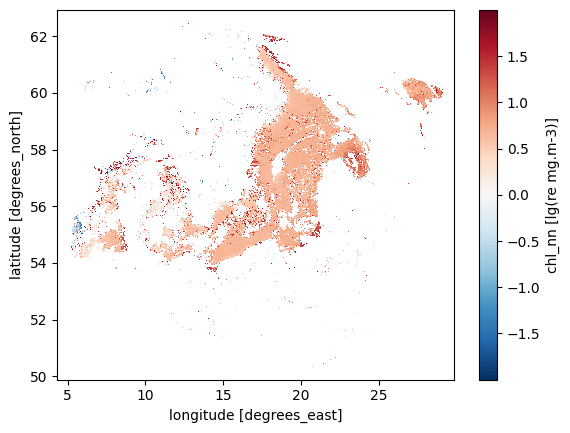

In [13]:
import xarray as xr

xr.open_dataset(result_path).chl_nn.plot()